<a href="https://colab.research.google.com/github/Dimasyr-c/Twitter-Sentiment-Analysis-Ipar-adalah-maut/blob/main/Final_Project_Dimas_Yudha_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/ipar_adalah_mautt (1).csv')

In [ ]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1863009112004730881,Sat Nov 30 23:55:59 +0000 2024,0,ipar adalah maut GONGNYAAA KURENG BGTT (kurang...,1863009112004730881,NaN,NaN,in,NaN,0,0,0,https://x.com/maemuoiy/status/1863009112004730881,1700008733584334848,maemuoiy
1,1863004016294375905,Sat Nov 30 23:35:45 +0000 2024,0,Selama nonton ipar adalah maut reaksiku dan be...,1863004016294375905,NaN,NaN,in,NaN,0,0,0,https://x.com/alinrawrd/status/186300401629437...,1538876132493168647,alinrawrd
2,1862994247215132885,Sat Nov 30 22:56:55 +0000 2024,0,w nonton ipar adalah maut dari tadi istigfar t...,1862994247215132885,NaN,NaN,in,NaN,0,1,0,https://x.com/kangsambats/status/1862994247215...,1080574398598279168,kangsambats
3,1862990238576185471,Sat Nov 30 22:41:00 +0000 2024,2,Energy abis gara2 abs nonton Ipar adalah maut ...,1862990238576185471,NaN,NaN,in,NaN,0,0,0,https://x.com/oiishikeiyaa/status/186299023857...,1522068623686500352,oiishikeiyaa
4,1862987728427880897,Sat Nov 30 22:31:01 +0000 2024,1,cowo nonton ipar adalah maut pada histeris jug...,1862987728427880897,NaN,NaN,in,Jakarta Pusat,0,1,0,https://x.com/enoliska_/status/186298772842788...,1049610640657006592,enoliska_


In [ ]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,ipar adalah maut GONGNYAAA KURENG BGTT (kurang...,maemuoiy,Sat Nov 30 23:55:59 +0000 2024
1,Selama nonton ipar adalah maut reaksiku dan be...,alinrawrd,Sat Nov 30 23:35:45 +0000 2024
2,w nonton ipar adalah maut dari tadi istigfar t...,kangsambats,Sat Nov 30 22:56:55 +0000 2024
3,Energy abis gara2 abs nonton Ipar adalah maut ...,oiishikeiyaa,Sat Nov 30 22:41:00 +0000 2024
4,cowo nonton ipar adalah maut pada histeris jug...,enoliska_,Sat Nov 30 22:31:01 +0000 2024
...,...,...,...
484,Gua nobar ipar adalah maut sepanjang nonton ng...,alpenzel,Tue Nov 26 12:13:27 +0000 2024
485,Wendy dengan crush ipar adalah tidak maut,ssonssana,Tue Nov 26 12:12:02 +0000 2024
486,@ikhhsn Jadi inget netizen Malaysia yg ngehina...,prestiliawp,Tue Nov 26 12:08:51 +0000 2024
487,akhirnyaa aku nonton ipar adalah maut!! gatau ...,tayoplum,Tue Nov 26 12:05:47 +0000 2024


# Cleansing

In [ ]:
df.shape

(489, 3)

In [ ]:
df = df.drop_duplicates(['full_text'])

In [ ]:
df.duplicated('full_text').sum()

0

Menghapus data duplikat dan data kosong

In [ ]:
df.dropna()
df.isnull().sum()

,0
full_text,0
username,0
created_at,0


In [ ]:
df.shape

(481, 3)

Dari 489 data didalam kolom fulltext setelah di cek duplikat dan nilai kosong, data berubah atau berkurang menjadi 481

In [ ]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Lowercase the text
    return text


df['full_text'] = df['full_text'].apply(clean_text)

<ipython-input-10-ee42fe2c9bbb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(clean_text)


In [ ]:
df['full_text'] = df['full_text'].str.lower()

<ipython-input-11-2b96b0b6be2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].str.lower()


In [ ]:
df

,full_text,username,created_at
0,ipar adalah maut gongnyaaa kureng bangett kura...,maemuoiy,Sat Nov 30 23:55:59 +0000 2024
1,selama nonton ipar adalah maut reaksiku dan be...,alinrawrd,Sat Nov 30 23:35:45 +0000 2024
2,w nonton ipar adalah maut dari tadi istigfar t...,kangsambats,Sat Nov 30 22:56:55 +0000 2024
3,energy abis gara abs nonton ipar adalah maut r...,oiishikeiyaa,Sat Nov 30 22:41:00 +0000 2024
4,cowo nonton ipar adalah maut pada histeris jug...,enoliska_,Sat Nov 30 22:31:01 +0000 2024
...,...,...,...
484,gua nobar ipar adalah maut sepanjang nonton ng...,alpenzel,Tue Nov 26 12:13:27 +0000 2024
485,wendy dengan crush ipar adalah tidak maut,ssonssana,Tue Nov 26 12:12:02 +0000 2024
486,jadi inget netizen malaysia yang ngehina hinu...,prestiliawp,Tue Nov 26 12:08:51 +0000 2024
487,akhirnyaa aku nonton ipar adalah maut gatau ra...,tayoplum,Tue Nov 26 12:05:47 +0000 2024


# Pre-processing

In [ ]:
#Normalisasi
norm = {'yg' : 'yang','nggak' : "tidak", 'bgt' : 'banget' , "esmosi" : 'emosi', 'gak' : 'tidak'}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(normalisasi)



<ipython-input-12-0b30a7055959>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(normalisasi)


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
#Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary # Correctly import StopWordRemoverFactory
more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'kayak', 'nya']

stop_words = StopWordRemoverFactory().get_stop_words() + more_stopword
stop_words.extend(more_stopword)

new_Array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_Array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

<ipython-input-15-341678d13f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(lambda x: stopword(x))


,full_text,username,created_at
0,ipar maut gongnyaaa kureng bangett kurang dape...,maemuoiy,Sat Nov 30 23:55:59 +0000 2024
1,selama nonton ipar maut reaksiku bestie lain c...,alinrawrd,Sat Nov 30 23:35:45 +0000 2024
2,w nonton ipar maut tadi istigfar trus,kangsambats,Sat Nov 30 22:56:55 +0000 2024
3,energy abis gara abs nonton ipar maut rani sin...,oiishikeiyaa,Sat Nov 30 22:41:00 +0000 2024
4,cowo nonton ipar maut histeris ya lucu anj,enoliska_,Sat Nov 30 22:31:01 +0000 2024


In [ ]:
#Tokenisasi
tokenized = df['full_text'].apply(lambda x: x.split())
tokenized

,full_text
0,"[ipar, maut, gongnyaaa, kureng, bangett, kuran..."
1,"[selama, nonton, ipar, maut, reaksiku, bestie,..."
2,"[w, nonton, ipar, maut, tadi, istigfar, trus]"
3,"[energy, abis, gara, abs, nonton, ipar, maut, ..."
4,"[cowo, nonton, ipar, maut, histeris, ya, lucu,..."
...,...
484,"[gua, nobar, ipar, maut, sepanjang, nonton, ng..."
485,"[wendy, crush, ipar, tidak, maut]"
486,"[jadi, inget, netizen, malaysia, ngehina, hinu..."
487,"[akhirnyaa, aku, nonton, ipar, maut, gatau, ra..."


In [ ]:
#Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean


tokenized = tokenized.apply(stemming)
tokenized.to_csv('tokenized ipar maut.csv', index=False)


ipar maut gongnyaaa reng bangett kurang dapet feel waktu tau padahal ekspektasiku tinggi alur sangat oke
lama nonton ipar maut reaksi bestie lain cuma misuh sama mual
w nonton ipar maut tadi istigfar trus
energy abis gara abs nonton ipar maut rani sini maju lo anj
cowo nonton ipar maut histeris ya lucu anj
nyata ipar maut tafsir sabda rosul coy al amwu almawt
nyala industri film indonesia negara tetangga walaupun not a good type of movie to begin ipar maut
fomo baru kelar nonton ipar maut
berhatihatilah kalian masuk dalam ruang temu wanita lalu orang pemuda anshor kata wahai rasulullah bagaimana dapat kena ipar beliau jawab ipar maut hr bukhari amp muslim
call bell ipar maut auto double triple quadruple kali nak ngamuk
udah x ini ipar maut
ipar maut
konteks abis nonton ipar maut
aduh salah banget gua malah nonton ipar maut jam sgni ajggggggfg
pose ipar maut banget btw mas haming
 bonus ipar maut a review by ajoy nyolong review orang letterboxd
iii who s agree with ujoy ipar maut sinetr

In [ ]:
data = pd.read_csv('/content/tokenized ipar maut.csv')
data

,full_text
0,ipar maut gongnyaaa reng bangett kurang dapet ...
1,lama nonton ipar maut reaksi bestie lain cuma ...
2,w nonton ipar maut tadi istigfar trus
3,energy abis gara abs nonton ipar maut rani sin...
4,cowo nonton ipar maut histeris ya lucu anj
...,...
476,gua nobar ipar maut panjang nonton ngomong pan...
477,wendy crush ipar tidak maut
478,jadi inget netizen malaysia ngehina hinu film ...
479,akhirnyaa aku nonton ipar maut gatau ratingnya...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import wordcloud
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data_tweet = list(data['full_text'])
polaritas = 0


status = []
total_positif = total_negatif = total_netral = total =0
for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 43
Negatif = 438

Total Data : 481


In [ ]:
data['klasifikasi'] = status
data

,full_text,klasifikasi
0,ipar maut gongnyaaa reng bangett kurang dapet ...,Negatif
1,lama nonton ipar maut reaksi bestie lain cuma ...,Negatif
2,w nonton ipar maut tadi istigfar trus,Negatif
3,energy abis gara abs nonton ipar maut rani sin...,Negatif
4,cowo nonton ipar maut histeris ya lucu anj,Negatif
...,...,...
476,gua nobar ipar maut panjang nonton ngomong pan...,Negatif
477,wendy crush ipar tidak maut,Negatif
478,jadi inget netizen malaysia ngehina hinu film ...,Negatif
479,akhirnyaa aku nonton ipar maut gatau ratingnya...,Negatif


In [ ]:
dataset = data.to_records(index=False)
dataset = [tuple(x) for x in dataset]

In [ ]:
import random

set_positif = []
set_negatif = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))

train = set_positif + set_negatif

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.9355509355509356


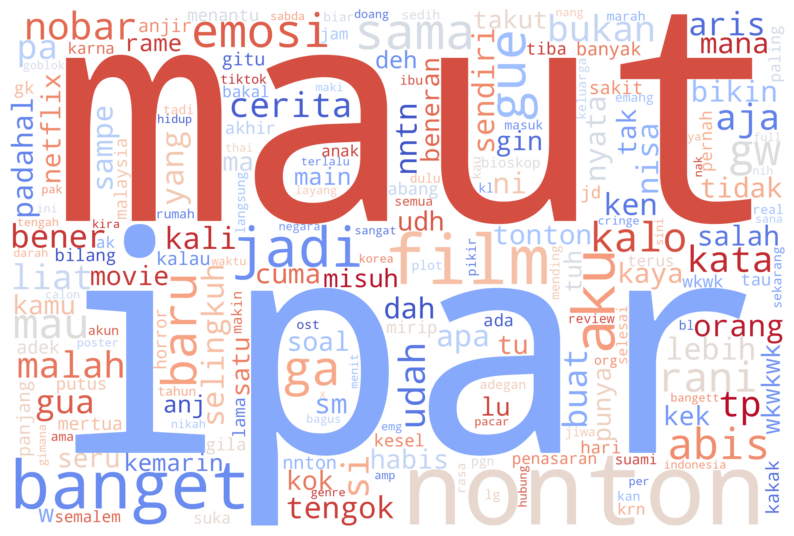

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear' )
    plt.axis("off");
    plt.show()

all_words = ' '.join([text for text in data['full_text']])

Wordclouds = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',
    colormap='coolwarm',
    collocations=False,
    stopwords=STOPWORDS).generate(all_words)

plot_cloud(Wordclouds)

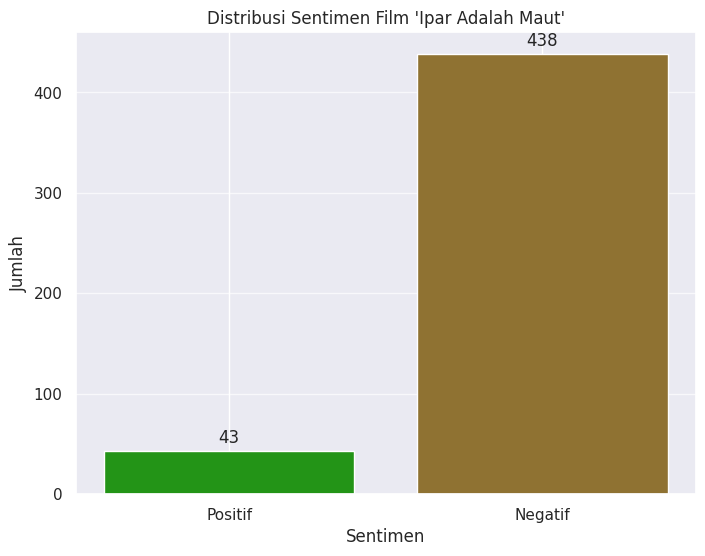

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set tema menggunakan Seaborn
sns.set_theme()

# Data label dan jumlah
labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

# Fungsi untuk menampilkan bar chart
def show_bar_chart(labels, counts, title):
    # Membuat figure dan axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Membuat bar chart
    bars = ax.bar(labels, counts, color=['#239417', '#8f7232'])

    # Menambahkan label pada tiap bar
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset posisi teks
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid di sumbu y
    ax.grid(axis='y', linestyle='-', alpha=0.7)

    # Menambahkan label dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan plot
    plt.show()

# Memanggil fungsi untuk menampilkan bar chart
show_bar_chart(labels, counts, "Distribusi Sentimen Film 'Ipar Adalah Maut'")


In [ ]:
data

,full_text,klasifikasi
0,ipar maut gongnyaaa reng bangett kurang dapet ...,Negatif
1,lama nonton ipar maut reaksi bestie lain cuma ...,Negatif
2,w nonton ipar maut tadi istigfar trus,Negatif
3,energy abis gara abs nonton ipar maut rani sin...,Negatif
4,cowo nonton ipar maut histeris ya lucu anj,Negatif
...,...,...
476,gua nobar ipar maut panjang nonton ngomong pan...,Negatif
477,wendy crush ipar tidak maut,Negatif
478,jadi inget netizen malaysia ngehina hinu film ...,Negatif
479,akhirnyaa aku nonton ipar maut gatau ratingnya...,Negatif


In [ ]:
data_eval = data.to_records(index=False)
data_eval = [tuple(x) for x in data_eval]

# Apply Naive Bayes classification to the entire dataset
klasifikasi_bayes = []
for text, klasifikasi_textblob in data_eval:  # Iterate and classify each text
    klasifikasi_bayes.append(cl.classify(text))

# Create a new DataFrame for evaluation
eval_df = pd.DataFrame({
    'full_text': data['full_text'],
    'klasifikasi_textblob': data['klasifikasi'],
    'klasifikasi_bayes': klasifikasi_bayes
})


# Function to highlight differences
def highlight_diff(row):
    if row['klasifikasi_textblob'] != row['klasifikasi_bayes']:
        return ['background-color: yellow'] * len(row)
    return [''] * len(row)

# Apply highlighting to the DataFrame
eval_df_styled = eval_df.style.apply(highlight_diff, axis=1)

# Display the styled DataFrame
eval_df_styled

# Print detailed comparison
for index, row in eval_df.iterrows():
    if row['klasifikasi_textblob'] != row['klasifikasi_bayes']:
        print(f"Text: {row['full_text']}")
        print(f"Klasifikasi TextBlob: {row['klasifikasi_textblob']}")
        print(f"Klasifikasi Bayes: {row['klasifikasi_bayes']}\n")

Text: nekat nonton main api luna sm darius nonton ipar maut nonton jgn salah aku selingkuh beneran bikin aku tbtb marah sm bojoku banget pgn ku jambak aja rasa bojoku ni
Klasifikasi TextBlob: Positif
Klasifikasi Bayes: Negatif

Text: tunang th hampir nikah h bulan gagal ipar ipar maut mana calon gue kek boneka idup suruh kesana kesana kesini kesini suruh nyemplung empang nyemplung suruh loncat sumur loncat the real dongo
Klasifikasi TextBlob: Positif
Klasifikasi Bayes: Negatif

Text: nonton ipar maut bukan pgn caci maki rani malah sebel sama si nisa soal terlalu positip tingking mulu midsomar film terapaansih jijik pgn tonton krn penasaran sama feeling apaansihnya hahaha
Klasifikasi TextBlob: Positif
Klasifikasi Bayes: Negatif

Text: she smiled wonpil siap jaring istrinyaa istri adek abang siap ipar maut krn tidakkai wa bwa
Klasifikasi TextBlob: Positif
Klasifikasi Bayes: Negatif

Text: yang main maut ipar bukan
Klasifikasi TextBlob: Positif
Klasifikasi Bayes: Negatif

Text: tukang sel